In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# reading the training data set
df1 = pd.read_csv("C:\\Users\\HP\\Downloads\\Train.csv")
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65


In [6]:
df1 = df1.drop(['Name', 'Unnamed: 0'], axis=1)

In [7]:
df1.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

In [8]:
# cleaning the data set
null_counts = df1.isnull().sum()
print(null_counts[null_counts > 0])

Mileage     1
Engine     28
Power      28
Seats      32
dtype: int64


In [9]:
df1['Mileage'] = df1['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df1['Engine'] = df1['Engine'].astype(str).str.replace(" CC", "").astype(float)
df1['Power'] = df1['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)

In [10]:
df1['Mileage'] = df1['Mileage'].fillna(df1['Mileage'].median())
df1['Engine'] = df1['Engine'].fillna(df1['Engine'].median())
df1['Power'] = df1['Power'].fillna(df1['Power'].median())
df1['Seats'] = df1['Seats'].fillna(df1['Seats'].median())

In [11]:
df1_new = pd.get_dummies(df1[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)

In [12]:
# making feature and target variables
feat1 = pd.concat([df1[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']], df1_new], axis=1)

In [13]:
tar1 = df1['Price']

In [14]:
feat1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2017,16500,23.84,1199.0,84.00,5.0,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
3,2007,200000,17.20,1396.0,53.50,5.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,2013,64000,21.02,1248.0,88.76,5.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2009,150000,11.00,2993.0,235.00,5.0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3746,2012,85000,11.79,2179.0,120.00,7.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3747,2007,55100,18.90,998.0,67.10,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3748,2014,77500,20.45,1461.0,83.80,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [15]:
tar1

0        5.00
1        8.37
2        4.50
3        0.85
4        2.65
        ...  
3745    18.75
3746     6.25
3747     1.45
3748     6.60
3749     2.35
Name: Price, Length: 3750, dtype: float64

In [16]:
# reading the testing data set
df2 = pd.read_csv("C:\\Users\\HP\\Downloads\\Test.csv")
df2.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75


In [17]:
df2 = df2.drop(['Name', 'Unnamed: 0'], axis=1)

In [18]:
df2.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

In [19]:
null_counts = df2.isnull().sum()
print(null_counts[null_counts > 0])

Mileage    1
Engine     6
Power      6
Seats      7
dtype: int64


In [20]:
df2['Mileage'] = df2['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df2['Engine'] = df2['Engine'].astype(str).str.replace(" CC", "").astype(float)
df2['Power'] = df2['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)

In [21]:
df2['Mileage'] = df2['Mileage'].fillna(df2['Mileage'].median())
df2['Engine'] = df2['Engine'].fillna(df2['Engine'].median())
df2['Power'] = df2['Power'].fillna(df2['Power'].median())
df2['Seats'] = df2['Seats'].fillna(df2['Seats'].median())

In [22]:
df2_new = pd.get_dummies(df2[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)

In [23]:
feat2 = pd.concat([df2[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']], df2_new], axis=1)

In [24]:
tar2 = df2['Price']

In [25]:
feat2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2013,84175,23.40,1248.0,74.00,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2012,62282,16.95,1197.0,78.90,5.0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2017,37460,18.60,1197.0,81.86,5.0,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
3,2011,106976,13.50,2400.0,215.00,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2013,60000,20.36,1197.0,78.90,5.0,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2013,71000,22.70,1582.0,126.20,5.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1246,2005,91000,16.80,1341.0,83.00,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1247,2017,50534,17.21,1197.0,103.50,5.0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1248,2012,83000,19.08,1582.0,126.32,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
tar2

0        6.95
1        2.90
2        6.28
3       13.80
4        2.75
        ...  
1245     6.80
1246     0.80
1247     8.27
1248     6.00
1249     9.51
Name: Price, Length: 1250, dtype: float64

In [27]:
# z score normalization
feat1 = (feat1 - feat1.mean()) / feat1.std()

In [28]:
feat2 = (feat2 - feat2.mean()) / feat2.std()

In [29]:
# putting target and feature values
x1 = feat1.values
y1 = tar1.values.reshape(-1, 1)

In [30]:
x2 = feat2.values
y2 = tar2.values.reshape(-1, 1)

In [31]:
# adding bias/intercept term
x1 = np.hstack([np.ones((x1.shape[0], 1)), x1])

In [32]:
x2 = np.hstack([np.ones((x2.shape[0], 1)), x2])

In [33]:
# giving weights
theta1 = np.random.randn(x1.shape[1], 1)

In [34]:
iterations = 1000
alpha = 0.01 # learning rate

In [35]:
# cost function
def computecost(x1, y1, theta1):
    m = len(y1)
    predict = x1.dot(theta1)
    cost = (1 / (2 * m)) * np.sum(np.square(predict - y1))
    return cost

In [36]:
def gradientdescent(x1, y1, theta1, alpha, iterations):
    m = len(y1)
    cost1 = []
    for i in range(iterations):
        gradients1 = (1 / m) * x1.T.dot(x1.dot(theta1) - y1)
        theta1 -= alpha * gradients1
        cost1.append(computecost(x1, y1, theta1))
    return theta1, cost1

In [37]:
theta_new1, cost1 = gradientdescent(x1, y1, theta1, alpha, iterations)

In [38]:
theta_new2, cost2 = gradientdescent(x2, y2, theta1, alpha, iterations)

In [39]:
theta_new1, cost1[-1]

(array([[ 9.77219617],
        [ 3.65838476],
        [ 0.62583814],
        [-1.08537892],
        [ 0.99944926],
        [ 5.72047807],
        [-1.16857538],
        [ 0.20883266],
        [-1.26612866],
        [-1.3533888 ],
        [ 0.06612139],
        [-0.37447547],
        [ 0.37104486],
        [ 0.31410593],
        [ 0.09278491],
        [ 0.26263901],
        [-0.3067768 ],
        [ 0.11499144],
        [-0.04500642],
        [-0.56138935],
        [-0.49156905],
        [-0.44303225],
        [-0.22300275]]),
 np.float64(19.040376855324826))

In [40]:
theta_new2, cost2[-1]

(array([[ 9.77219617],
        [ 3.65838476],
        [ 0.62583814],
        [-1.08537892],
        [ 0.99944926],
        [ 5.72047807],
        [-1.16857538],
        [ 0.20883266],
        [-1.26612866],
        [-1.3533888 ],
        [ 0.06612139],
        [-0.37447547],
        [ 0.37104486],
        [ 0.31410593],
        [ 0.09278491],
        [ 0.26263901],
        [-0.3067768 ],
        [ 0.11499144],
        [-0.04500642],
        [-0.56138935],
        [-0.49156905],
        [-0.44303225],
        [-0.22300275]]),
 np.float64(18.408619072484196))

In [41]:
def predict(x, theta):
    pred=np.dot(x,theta)
    return pred

In [42]:
print(tar1.shape, theta_new1.shape)

(3750,) (23, 1)


In [43]:
print(tar2.shape, theta_new2.shape)

(1250,) (23, 1)


In [44]:
pred_cost1=predict(x1,theta1)
pred_cost1

array([[ 7.13853714],
       [11.5523578 ],
       [ 7.27378834],
       ...,
       [-4.77181262],
       [ 8.48905895],
       [-1.13021748]])

In [46]:
pred_cost2=predict(x2,theta1)
pred_cost2

array([[ 4.37296297],
       [ 4.2636061 ],
       [ 5.96332933],
       ...,
       [14.50458045],
       [12.7171114 ],
       [10.54270291]])

In [47]:
pred_cost1 = pred_cost1.reshape(-1)

In [48]:
pred_cost2 = pred_cost2.reshape(-1)

In [49]:
print(tar1.shape)
print(pred_cost1.shape)

(3750,)
(3750,)


In [50]:
print(tar2.shape)
print(pred_cost2.shape)

(1250,)
(1250,)


In [51]:
def rsq(tar, pred_cost):
    rss = np.sum((tar - pred_cost) ** 2)  # Residual sum of squares
    tss = np.sum((tar - np.mean(pred_cost)) ** 2)  # Total sum of squares
    return 1 - rss / tss

In [52]:
outrsq1=rsq(tar1, pred_cost1)
outrsq2=rsq(tar2, pred_cost2)
print(f"Training R² Score: {outrsq1 * 100:.2f}%")
print(f"Testing R² Score: {outrsq2 * 100:.2f}%")

Training R² Score: 67.87%
Testing R² Score: 70.30%


In [53]:
print("Final cost of testing set:", cost2[-1])

Final cost of testing set: 18.408619072484196


In [54]:
print("Final weights:", theta_new2)

Final weights: [[ 9.77219617]
 [ 3.65838476]
 [ 0.62583814]
 [-1.08537892]
 [ 0.99944926]
 [ 5.72047807]
 [-1.16857538]
 [ 0.20883266]
 [-1.26612866]
 [-1.3533888 ]
 [ 0.06612139]
 [-0.37447547]
 [ 0.37104486]
 [ 0.31410593]
 [ 0.09278491]
 [ 0.26263901]
 [-0.3067768 ]
 [ 0.11499144]
 [-0.04500642]
 [-0.56138935]
 [-0.49156905]
 [-0.44303225]
 [-0.22300275]]


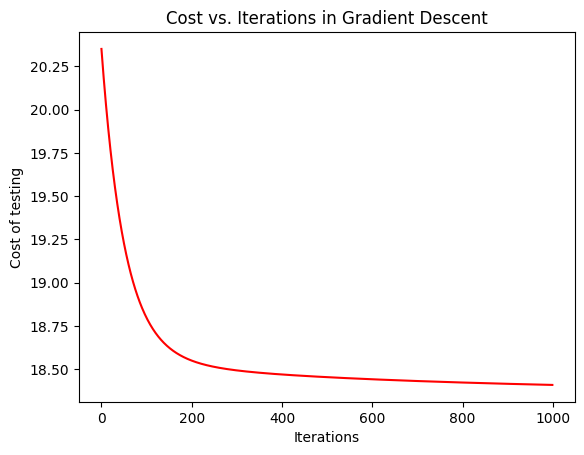

In [55]:
# cost of testing sets vs iterations 
plt.plot(range(iterations), cost2, color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost of testing")
plt.title("Cost vs. Iterations in Gradient Descent")
plt.show()

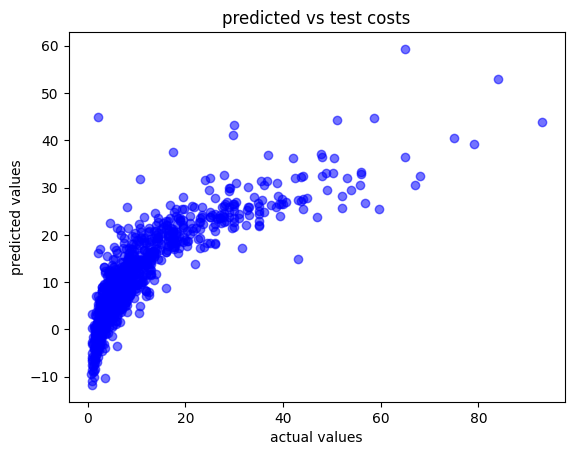

In [56]:
# for graph of preicted vs test costs
plt.scatter(tar2,pred_cost2,color='blue',alpha=0.55)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('predicted vs test costs')
plt.show()